Nama    : Rizki Muhammad Syarif

NIM     : 1207070111

Kelas   : TKK


Praktikum 5 | Pengolahan Citra

Brightness, Contrass, Autolevel Contrass

Import dependency

In [7]:
# memanggil library 
import numpy as np
import imageio
import matplotlib.pyplot as plt

Membaca gambar

In [8]:
# membaca file gambar  dan menyimpannya ke dalam variabel "img"
img = imageio.imread("Shikamaru.jpeg")

C:\Users\Rizki M. Syarif\AppData\Local\Temp\ipykernel_9848\3312055089.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("Shikamaru.jpeg")


Mendapatkan resolusi dan type dari gambar

In [9]:
img_height = img.shape[0]
img_width = img.shape[1]
img_channel = img.shape[2]
img_type = img.dtype

Brightness Grayscale

Membuat variabel img_brightness untuk menampung hasil

In [10]:
# untuk membuat array numpy 3 dimensi dengan dimensi yang sama dengan citra img dan tipe data uint8.
img_brightness = np.zeros(img.shape, dtype=np.uint8)

Melakukan penambahan brightness dengan nilai yg menjadi parameter

In [11]:
# fungsi brighter dengan parameter nilai
def brighter(nilai):
    for y in range(0, img_height):
        for x in range(0, img_width):
            red = img[y][x][0]
            # untuk mendapatkan informasi piksel gambar dari RGB
            green = img[y][x][1]
            blue = img[y][x][2]
            # menghitung nilai rata-rata untuk mendapatkan nilai keabuan
            gray = (int(red) + int(green) + int(blue)) / 3
            gray += nilai
            if gray > 255:
                gray = 255
            if gray < 0:
                gray = 0
            # untuk menampung nilai baru
            img_brightness[y][x] = (gray, gray, gray) 

Menampilkan beberapa hasil dengan nilai brightness -100 dan 100

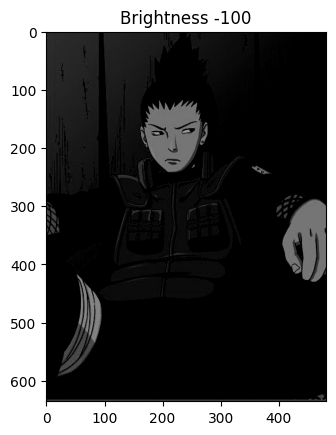

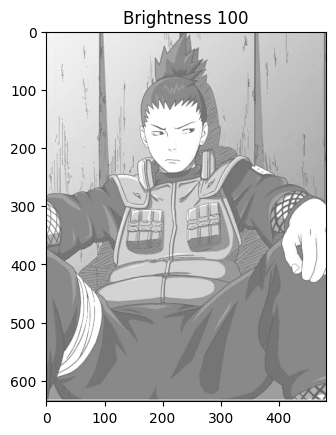

In [12]:
# untuk melakukan penyesuaian kecerahan pada citra dengan cara menambahkan nilai kecerahan pada setiap piksel citra
brighter(-100)
plt.imshow(img_brightness)
plt.title("Brightness -100")
plt.show()

brighter(100)
plt.imshow(img_brightness)
plt.title("Brightness 100")
plt.show()

Brightness RGB

Membuat variabel img_rgbbrightness untuk menampung hasil

In [13]:
# untuk membuat array kosong dengan dimensi yang sama
img_rgbbrightness = np.zeros(img.shape, dtype=np.uint8)

Melakukan penambahan brightness dengan nilai yg menjadi parameter

In [14]:
def rgbbrighter(nilai):
    for y in range(0, img_height):
        for x in range(0, img_width):
            # untuk mendapatkan informasi piksel gambar dari red
            red = img[y][x][0]
            red += nilai
            if red > 255:
                red = 255
            if red < 0:
                red = 0
            # untuk mendapatkan informasi piksel gambar dari green
            green = img[y][x][1]
            green += nilai
            if green > 255:
                green = 255
            if green < 0:
                green = 0
            # untuk mendapatkan informasi piksel gambar dari blue
            blue = img[y][x][2]
            blue += nilai
            if blue > 255:
                blue = 255
            if blue < 0:
                blue = 0
            #  untuk menampung nilai baru
            img_rgbbrightness[y][x] = (red, green, blue)

Menampilkan beberapa hasil dengan nilai brightness -100 dan 100

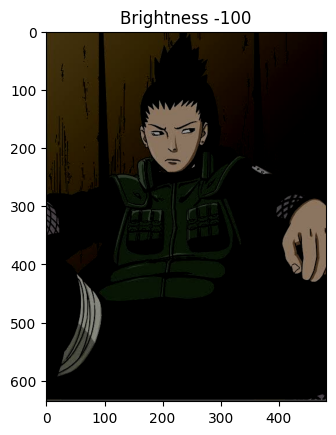

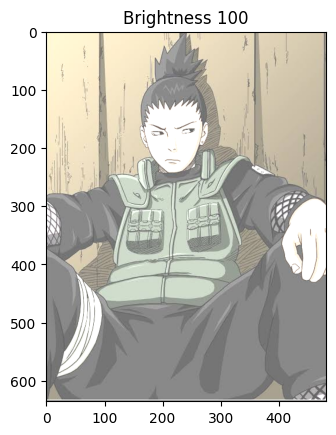

In [15]:
# untuk memperbaiki kecerahan atau kegelapan gambar berwarna (RGB)
rgbbrighter(-100)
plt.imshow(img_rgbbrightness)
plt.title("Brightness -100")
plt.show()

rgbbrighter(100)
plt.imshow(img_rgbbrightness)
plt.title("Brightness 100")
plt.show()

Contrass

1. Membuat variabel img_contrass untuk menampung hasil

In [16]:
# untuk membuat array numpy dengan ukuran dan tipe data yang sama dengan gambar asli
img_contrass = np.zeros(img.shape, dtype=np.uint8)

2. Melakukan penambahan contrass dengan nilai yg menjadi parameter

In [17]:
def contrass(nilai):
    for y in range(0, img_height):
        for x in range(0, img_width):
            # untuk mendapatkan informasi piksel gambar dari RGB
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            # menghitung nilai rata-rata untuk mendapatkan nilai keabuan
            gray = (int(red) + int(green) + int(blue)) / 3
            # mengalikan nilai keabuan dengan nilai
            gray *= nilai
            if gray > 255:
                gray = 255
            #  untuk menampung nilai baru
            img_contrass[y][x] = (gray, gray, gray)

Menampilkan beberapa hasil dengan nilai contrass 50 dan 100

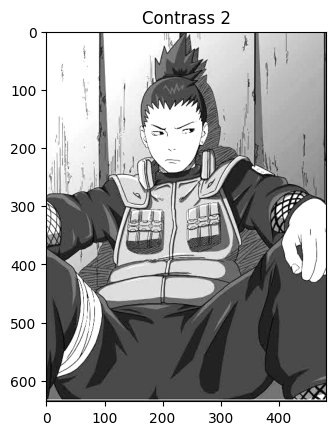

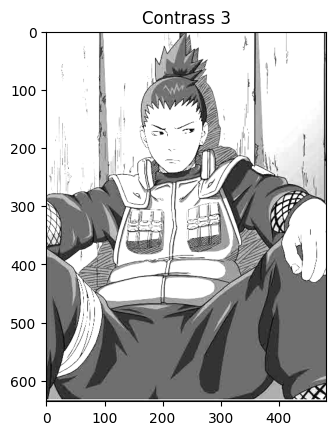

In [18]:
# untuk melakukan modifikasi kontras pada citra
contrass(2)
plt.imshow(img_contrass)
plt.title("Contrass 2")
plt.show()

contrass(3)
plt.imshow(img_contrass)
plt.title("Contrass 3")
plt.show()

Contrass Autolevel

1. Membuat variabel img_contrass untuk menampung hasil

In [19]:
# untuk membuat array numpy yang berukuran sama dengan citra
img_autocontrass = np.zeros(img.shape, dtype=np.uint8)

2. Melakukan penambahan contrass secara otomatis

In [20]:
def autocontrass():
    xmax = 300
    xmin = 0
    d = 0
    # Mendapatkan nilai d, dimana nilai d ini akan berpengaruh pada hitungan
    # untuk mendapatkan tingkat kontras
    for y in range(0, img_height):
        for x in range(0, img_width):
            # untuk mendapatkan informasi piksel gambar dari RGB
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            # menhitung nilai rata-rata untuk mendapatkan nilai keabuan
            gray = (int(red) + int(green) + int(blue)) / 3
            if gray < xmax:
                xmax = gray
            if gray > xmin:
                xmin = gray
    # menghitung selisih xmin-xmax dan menyimpannya di variable d            
    d = xmin-xmax
    for y in range(0, img_height):
        for x in range(0, img_width):
            # untuk mendapatkan informasi piksel gambar dari RGB
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            gray = (int(red) + int(green) + int(blue)) / 3
            # menghitung nilai keabuan baru
            gray = int(float(255/d) * (gray-xmax))
            #  untuk menampung nilai baru
            img_autocontrass[y][x] = (gray, gray, gray)

3. Menampilkan hasil autolevel contrass

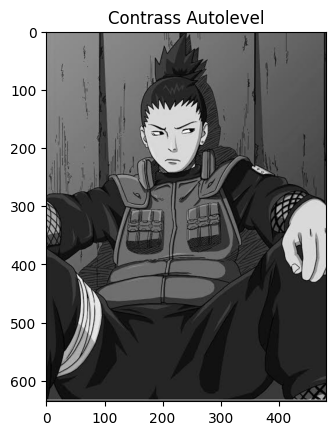

In [21]:
# untuk melakukan peningkatan kontras otomatis pada citra
autocontrass()
plt.imshow(img_autocontrass)
plt.title("Contrass Autolevel")
plt.show()